In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms.v2.functional as F_v2
from Utils.cfg import mnist_cfg, modelnet10_cfg
from Utils.utils import get_model, get_writer, get_datasets
from Utils.evals import linear_probing, eval_representations

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os

In [2]:
cfg = mnist_cfg(
    experiment='action_ablation',
    trial='iGPA',
    model_type='GPA',
    device='cuda',
)[0]
# cfg = mnist_cfg(
#     experiment='action_ablation',
#     trial='iGPA_no_actions',
#     model_type='iGPA',
#     device='cuda',
#     consider_actions=False,
# )[0]

model = get_model(cfg)
num_params = sum(p.numel() for p in model.parameters())
# model.load_state_dict(torch.load('out/mnist/models/BYOPL/BYOPL_3e-4/0.pth'))
# model.load_state_dict(torch.load('out/mnist/models/iJEPA_cnn/base/0.pth'))
model.load_state_dict(torch.load(f'out/{cfg["dataset"]}/models/{cfg["experiment"]}/{cfg["trial"]}/0.pth'))
print(num_params/1e6)
device = torch.device(cfg['compute_device'])

eval_representations(model, cfg)


C:\Users\joeag\AppData\Local\Temp\ipykernel_12532\2656495329.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'out/{cfg["dataset"]}/mod

3.014465


{'corr': 0.003175190184265375,
 'std': 0.03436195105314255,
 'entropy': 0.9264621138572693}

In [5]:
cfg = mnist_cfg(
    experiment='action_ablation',
    trial='iGPA_no_actions',
    model_type='GPA',
    device='cuda',
    consider_actions=False,
)[0]
# cfg = mnist_cfg(
#     experiment='action_ablation',
#     trial='iGPA_no_actions',
#     model_type='iGPA',
#     device='cuda',
#     consider_actions=False,
# )[0]

model2 = get_model(cfg)
num_params = sum(p.numel() for p in model.parameters())
# model.load_state_dict(torch.load('out/mnist/models/BYOPL/BYOPL_3e-4/0.pth'))
# model.load_state_dict(torch.load('out/mnist/models/iJEPA_cnn/base/0.pth'))
model2.load_state_dict(torch.load(f'out/{cfg["dataset"]}/models/{cfg["experiment"]}/{cfg["trial"]}/0.pth'))
print(num_params/1e6)
device = torch.device(cfg['compute_device'])

eval_representations(model2, cfg)


C:\Users\joeag\AppData\Local\Temp\ipykernel_5716\2960863378.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(f'out/{cfg["dataset"]}/mod

3.014465


{'corr': 0.028706541284918785,
 'std': 0.035995058715343475,
 'entropy': 0.9310135245323181}

In [5]:
from torchvision import datasets, transforms
from Examples.ModelNet10.dataset import ModelNet10Simple
from Utils.dataset import PreloadedDataset

train_set, val_set = get_datasets(cfg)
if cfg['dataset'] == 'mnist':
    t_dataset = datasets.MNIST(root='../Datasets/', train=False, transform=transforms.ToTensor(), download=True)
elif cfg['dataset'] == 'modelnet10':
    t_dataset = ModelNet10Simple(cfg['root'], split='test', device=cfg['compute_device'], use_tqdm=cfg['local'], rank=cfg['ddp_rank'], world_size=cfg['ddp_world_size'], seed=cfg['seed'])
test_set = PreloadedDataset.from_dataset(t_dataset, transforms.ToTensor(), device, use_tqdm=cfg['local'])
    


In [4]:
cfg['bn_output'] = True
for n in [1, 10, 100, 1000]:
    writer = None
    linear_probing(model, writer, n, cfg)

N: 1 - Test accuracy: 0.5844999551773071


N: 10 - Test accuracy: 0.8053998947143555


N: 100 - Test accuracy: 0.9305999279022217


N: 1000 - Test accuracy: 0.9638000130653381


In [ ]:
model.load_state_dict(torch.load('out/mnist/models/comparison/iJEPA/0.pth'))
for n in [1, 10, 100, 1000]:
    writer = get_writer(cfg, n)
    linear_probing(model, writer, n, cfg)

C:\Users\joeag\AppData\Local\Temp\ipykernel_26612\4126375559.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('out/mnist/models/compariso

N: 1 - Test accuracy: 0.43389999866485596


N: 10 - Test accuracy: 0.7990000247955322


N: 100 - Test accuracy: 0.9394999742507935


N: 1000 - Test accuracy: 0.9692999124526978


In [10]:
dataloader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=True)
losses = []
for i, (imgs1, _) in enumerate(dataloader):
    imgs2, actions = model.interact(imgs1)
    mean_targets = find_mean_aug(imgs1)
    if not model.consider_actions:
        actions *= 0.0
    preds = model.predict(imgs1, actions)
    loss = F.mse_loss(preds, mean_targets)
    losses.append(loss.item())
print(np.mean(losses))


0.05286253057420254


In [8]:
dataloader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=True)
losses = []
for i, (imgs1, _) in enumerate(dataloader):
    imgs2, actions = model.interact(imgs1)
    mean_targets = find_mean_aug(imgs1)
    if not model.consider_actions:
        actions *= 0.0
    preds = model.predict(imgs1, actions)
    loss = F.mse_loss(preds, mean_targets)
    losses.append(loss.item())
print(np.mean(losses))

0.0010084320383612067


In [33]:
dataloader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=True)
losses = []
for i, (images, _) in enumerate(dataloader):
    loss = model.loss(images, None, None, None)
    losses.append(loss.item())
print(np.mean(losses))


0.05963072218000889


In [3]:
import torch.nn.functional as F
# Will mix two numbers of same class 1/num_classes of the time
class MakeNegativeSample():
    def __init__(self, dataset, steps=10):
        self.dataset = dataset
        self.steps=steps
        self.n = len(dataset)
    def __call__(self, x, steps=None):
        if steps is None:
            steps = self.steps
        i = torch.randint(0, self.n-1, (x.shape[0],))
        return mix_images(x, self.dataset[i][0], steps=steps)

def mix_images(x1, x2, steps=10, return_mask=False):
    device = x1.device
    mask = torch.bernoulli(torch.ones((x1.shape[0],1,28,28))*0.5).to(device)
    # blur  with a filter of the form [1/4, 1/2, 1/4] in both horizontal and veritical directions
    filter_h = torch.tensor([[1/4, 1/2, 1/4]]).unsqueeze(0).to(device)
    filter_v = torch.tensor([[1/4], [1/2], [1/4]]).unsqueeze(0).to(device)
    for _ in range(steps):
        mask = F.conv2d(mask, filter_h.unsqueeze(0), padding='same')
        mask = F.conv2d(mask, filter_v.unsqueeze(0), padding='same')
    
    # threshold at 0.5
    mask_1 = mask > 0.5
    mask_2 = mask <= 0.5

    out = x1*mask_1 + x2*mask_2
    if return_mask:
        return out.squeeze(0), mask_1
    else:
        return out.squeeze(0)

def get_transform_args(p=0.25):
    act_p = torch.rand(5) # whether to apply each augmentation
    angle = torch.rand(1).item() * 360 - 180 if act_p[0] < p else 0
    translate_x = torch.randint(-8, 9, (1,)).item() if act_p[1] < p else 0
    translate_y = torch.randint(-8, 9, (1,)).item() if act_p[2] < p else 0
    scale = torch.rand(1).item() * 0.5 + 0.75 if act_p[3] < p else 1.0
    shear = torch.rand(1).item() * 50 - 25 if act_p[4] < p else 0
    return angle, translate_x, translate_y, scale, shear

def transform(images, p=0.25, subgroups=1):
    images_aug = torch.empty_like(images)
    actions = torch.zeros(images.shape[0], 5, device=images.device)
    num_per_group = images.shape[0] // subgroups
    for g in range(subgroups):
        lo = g*num_per_group
        hi = min(lo + num_per_group, images.shape[0])
        angle, translate_x, translate_y, scale, shear = get_transform_args(p=p)
        images_aug[lo:hi] = F_v2.affine(images[lo:hi], angle=angle, translate=(translate_x, translate_y), scale=scale, shear=shear)
        actions[lo:hi] = torch.tensor([angle/180, translate_x/8, translate_y/8, (scale-1.0)/0.25, shear/25], device=images.device).unsqueeze(0).repeat(num_per_group, 1)
    return images_aug, actions

def transform_with_args(images, angle, translate_x, translate_y, scale, shear):
    images_aug = torch.empty_like(images)
    actions = torch.zeros(images.shape[0], 5, device=images.device)
    images_aug = F_v2.affine(images, angle=angle, translate=(translate_x, translate_y), scale=scale, shear=shear)
    actions = torch.tensor([angle/180, translate_x/8, translate_y/8, (scale-1.0)/0.25, shear/25], device=images.device).unsqueeze(0).repeat(images.shape[0], 1)
    return images_aug, actions

def get_images(dataset):
    images = torch.empty((10, 1, 28, 28), dtype=torch.float32, device=cfg['compute_device'])
    for c in range(10):
        indices = torch.where(dataset.targets == c)[0]
        idx = indices[torch.randint(0, len(indices), (1,))]
        images[c] = dataset[idx][0]
    return images

def get_set(dataset, model, model2, p=0.25, negative=False, steps=10, subgroups=1):
    generator = MakeNegativeSample(dataset, steps=steps)
    images = get_images(dataset)
    images = images[2].unsqueeze(0).repeat(10, 1, 1, 1)
    if negative:
        images = generator(images)
    images_aug, actions = transform(images, p, subgroups=subgroups)
    preds = model.predict(images, actions)
    preds2 = model2.predict(images, actions)
    mean_aug = find_mean_aug(images)
    return images, images_aug, preds, preds2, mean_aug

def find_mean_aug(images, p=0.25, n=1000):
    transformed = []
    for _ in range(n):
        images_aug, actions = transform(images, p, subgroups=1)
        transformed.append(images_aug)
    return torch.mean(torch.stack(transformed), dim=0)

def show(model, model2, dataset, p=0.25, groups=1, subgroups=1, negative=False, steps=10, num=10):
    assert num <= 10
    fig, axs = plt.subplots(5*groups, num, figsize=(7, 7*groups))
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    for g in range(groups):
        images, images_aug, preds, preds2, mean_aug = get_set(dataset, model, model2, p=p, negative=negative, steps=steps, subgroups=subgroups)
        # mean_aug = find_mean_aug(images, p=p, n=1000)
        for i in range(num):
            if i == 0:
                axs[3*g + 0, i].set_ylabel('Initial', fontsize=12)
                axs[3*g + 1, i].set_ylabel('Target', fontsize=12)
                axs[3*g + 2, i].set_ylabel('w/ Actions', fontsize=12)
                axs[3*g + 3, i].set_ylabel('w/o Actions', fontsize=12)
                axs[3*g + 4, i].set_ylabel('Mean', fontsize=12)
            # axs[3*g + 0, i].set_title(f'{i}', fontsize=12)
            axs[3*g + 0, i].imshow(images[i].squeeze().cpu(), cmap='gray')
            axs[3*g + 1, i].imshow(images_aug[i].squeeze().cpu(), cmap='gray')
            axs[3*g + 2, i].imshow(preds[i].squeeze().cpu().detach(), cmap='gray')
            axs[3*g + 3, i].imshow(preds2[i].squeeze().cpu().detach(), cmap='gray')
            axs[3*g + 4, i].imshow(mean_aug[i].squeeze().cpu(), cmap='gray')
    plt.axis('off')
    plt.show()

show(model, model2, test_set, num=5, subgroups=10, p=0.35)



NameError: name 'model2' is not defined

C:\Users\joeag\AppData\Local\Temp\ipykernel_19992\457207165.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'out/{cfg["dataset"]}/mode

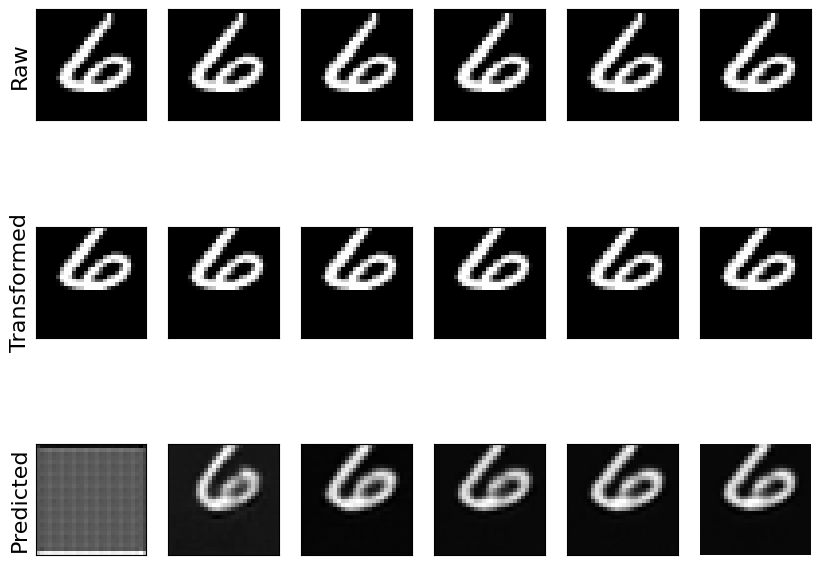

In [24]:

cfg = mnist_cfg(
    experiment='viz',
    trial='iGPA',
    model_type='iGPA',
    device='cuda',
)[0]
model = get_model(cfg)

idx = torch.randint(0, len(train_set), (1,)).item()
raw = train_set[idx][0].unsqueeze(0)
aug, actions = transform(raw, p=0.25, subgroups=1)

preds = torch.empty((6, 1, 28, 28), dtype=torch.float32, device=cfg['compute_device'])
for i in range(6):
    if i == 0:
        preds[0] = model.predict(raw, actions).squeeze().detach()
    elif i < 5:
        save_epochs = [50, 100, 150, 200]
        model.load_state_dict(torch.load(f'out/{cfg["dataset"]}/models/{cfg["experiment"]}/{cfg["trial"]}/0_epoch_{save_epochs[i-1]}.pth'))
        preds[i] = model.predict(raw, actions).squeeze().detach()
    else:
        model.load_state_dict(torch.load(f'out/{cfg["dataset"]}/models/{cfg["experiment"]}/{cfg["trial"]}/0.pth'))
        preds[i] = model.predict(raw, actions).squeeze().detach()
print(f'')
fig, axs = plt.subplots(3, 6, figsize=(10, 8*1))
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
for i in range(6):
    if i == 0:
        axs[0, i].set_ylabel('Raw', fontsize=16)
        axs[1, i].set_ylabel('Transformed', fontsize=16)
        axs[2, i].set_ylabel('Predicted', fontsize=16)
    axs[0, i].imshow(raw.squeeze().cpu(), cmap='gray')
    axs[1, i].imshow(aug.squeeze().cpu(), cmap='gray')
    axs[2, i].imshow(preds[i].squeeze().cpu().detach(), cmap='gray')
plt.axis('off')
plt.show()


In [6]:
def rand_crop(images, groups=10):
    N, C, H, W = images.shape
    crop_size = 14
    num_per_group = N // groups
    img1 = torch.zeros((N, C, crop_size, crop_size))
    img2 = torch.zeros((N, C, crop_size, crop_size))
    actions = torch.zeros((N, 4))
    for g in range(groups):
        start_x = torch.randint(0, W-crop_size, (2,))
        start_y = torch.randint(0, H-crop_size, (2,))
        img1[g*num_per_group:(g+1)*num_per_group] = images[g*num_per_group:(g+1)*num_per_group, :, start_y[0]:start_y[0]+crop_size, start_x[0]:start_x[0]+crop_size]
        img2[g*num_per_group:(g+1)*num_per_group] = images[g*num_per_group:(g+1)*num_per_group, :, start_y[1]:start_y[1]+crop_size, start_x[1]:start_x[1]+crop_size]
        actions[g*num_per_group:(g+1)*num_per_group] = torch.tensor([start_x[0]/14, start_y[0]/14, start_x[1]/14, start_y[1]/14], device=images.device)
    img1 = F_v2.resize(img1, (28, 28))
    img2 = F_v2.resize(img2, (28, 28))

    return img1, img2, actions

images = get_images(train_set)
img1, img2 = rand_crop(images)
fig, axs = plt.subplots(3, 10, figsize=(10, 4))
for i in range(10):
    axs[0, i].imshow(images[i].squeeze().cpu(), cmap='gray')
    axs[1, i].imshow(img1[i].squeeze().cpu(), cmap='gray')
    axs[2, i].imshow(img2[i].squeeze().cpu(), cmap='gray')
plt.show()
axs[1].set_title('After')
plt.show()



ValueError: too many values to unpack (expected 2)

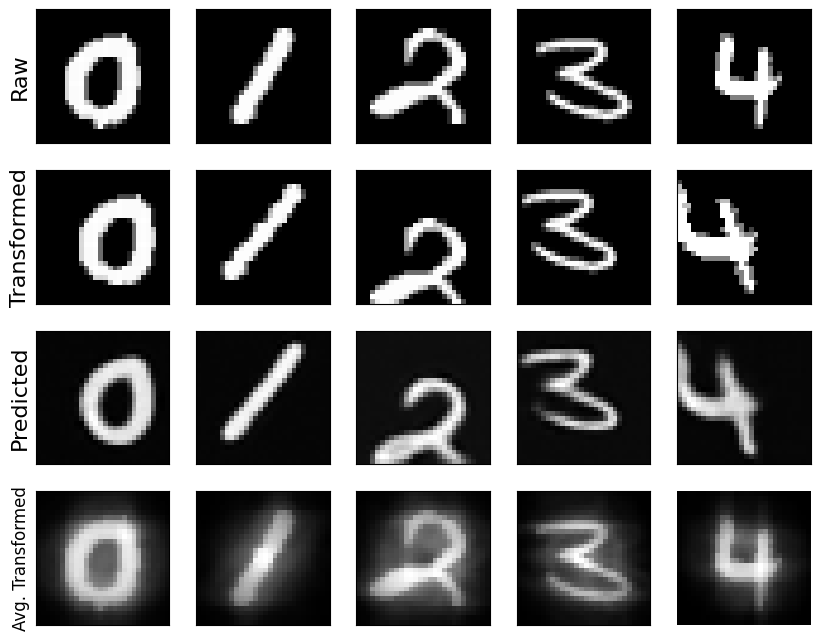

In [8]:
show(model, train_set, p=0.35, groups=1, negative=False, steps=7, subgroups=10, num=5)

In [13]:
def eval(model, dataset, p=0.25, groups=100, negative=False, steps=10):
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=True)
    generator = MakeNegativeSample(dataset, steps=steps)
    mean_losses = []
    for _ in range(10):
        losses = []
        for i, (images, _) in enumerate(test_loader):
            if negative:
                images = generator(images)
            images_aug, actions = grouped_transform(images, groups, p)
            loss = model.loss(img1=images, img2=images_aug, actions=actions, teacher=model)
            losses.append(loss.item())
        mean_losses.append(np.mean(losses))
    mean_loss = np.mean(mean_losses) * 100
    std_loss = np.std(mean_losses) * 100
    print(f'{mean_loss} ± {std_loss}')

eval(model, test_set, p=1.0, groups=100, negative=False, steps)
eval(model, test_set, p=1.0, groups=100, negative=True, steps=10)

SyntaxError: positional argument follows keyword argument (778384519.py, line 18)

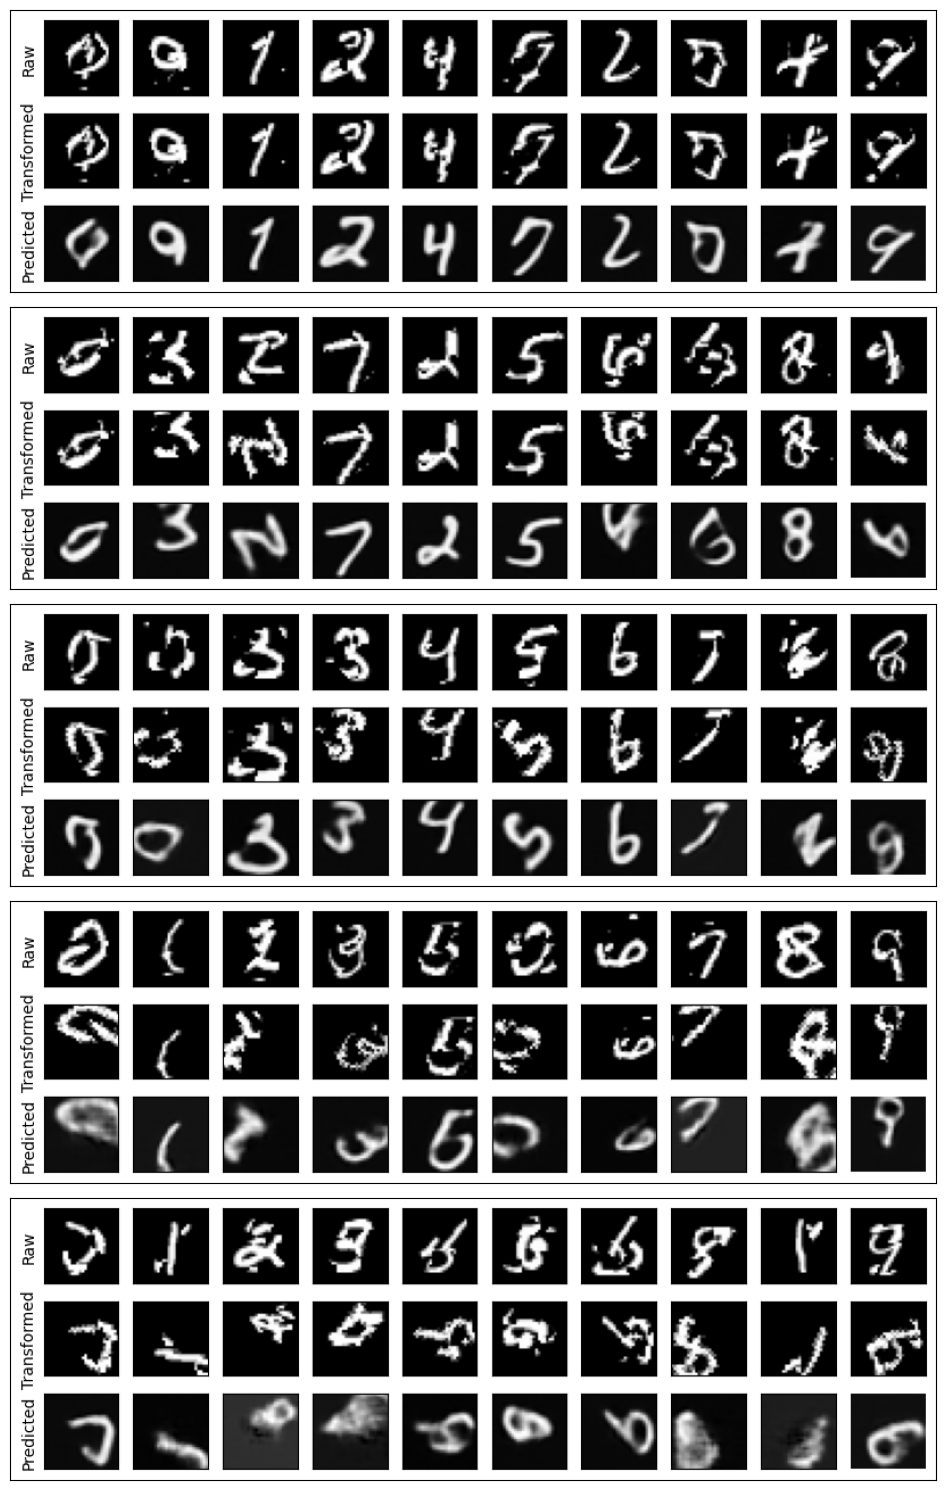

In [89]:
root = 'assets/negative_examples/'
imgs = []
for p in os.listdir(root):
    path = os.path.join(root, p)
    imgs.append(plt.imread(path))

fig, axs = plt.subplots(5, 1, figsize=(10, 15))
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
for i in range(5):
    axs[i].imshow(imgs[i], cmap='gray')
plt.tight_layout()
plt.show()


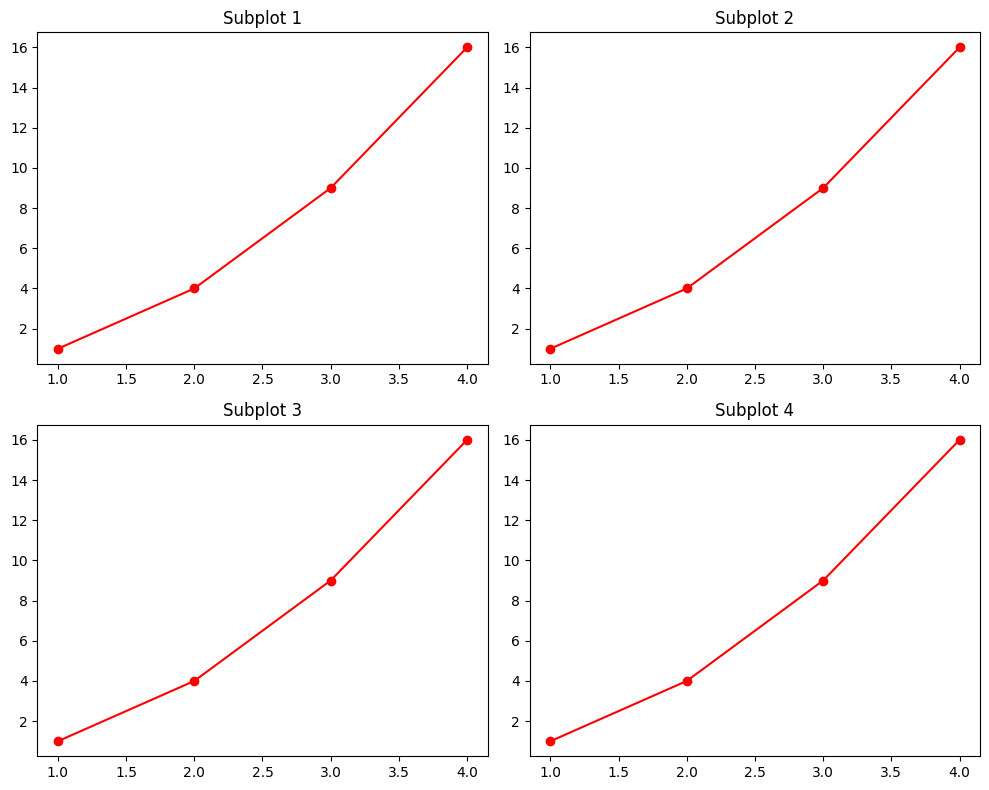

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        axs[i, j].set_title(f'Subplot {i*2+j+1}')
        axs[i, j].plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')
plt.tight_layout()
plt.show()


In [13]:
image_idx = torch.randint(0, len(train_set), (1,)).item()
image = train_set[image_idx][0].unsqueeze(0)
def func(image, model, angle, translate_x, translate_y, scale, shear):
    images_aug, actions = transform_with_args(image, angle, translate_x, translate_y, scale, shear)
    preds = model.predict(image, actions)
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    for ax in axs.flat:
        ax.axis('off')
    axs[0].imshow(image.squeeze().cpu(), cmap='gray')
    axs[1].imshow(images_aug.squeeze().cpu(), cmap='gray')
    axs[2].imshow(preds.squeeze().cpu().detach(), cmap='gray')
    plt.axis('off')
    plt.show()

interact(func, image=fixed(image), model=fixed(model), angle=widgets.FloatSlider(min=-180, max=180, step=1), translate_x=widgets.IntSlider(min=-8, max=8, step=1), translate_y=widgets.IntSlider(min=-8, max=8, step=1), scale=widgets.FloatSlider(min=0.75, max=1.25, step=0.01), shear=widgets.FloatSlider(min=-25, max=25, step=1))



interactive(children=(FloatSlider(value=0.0, description='angle', max=180.0, min=-180.0, step=1.0), IntSlider(…

<function __main__.func(image, model, angle, translate_x, translate_y, scale, shear)>